In [18]:
import csv
import pdb
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns


all_calls_path = './all_calls_nocall_exclude.txt'
all_calls = np.genfromtxt(all_calls_path, delimiter=',', dtype=str)


cnvnatorcalls = all_calls[:,4]
chrs = all_calls[:,1]
starts = all_calls[:,2]
ends = all_calls[:,3]

# inds = np.load('data_list_indexes_test_weightedcrossent_embeddingout2.npy')
ecolecalls = all_calls[:,5]
ecolecalls = ecolecalls.astype(np.float)
ends = ends.astype(np.float)
starts = starts.astype(np.float)

lens = ends - starts
lens = lens.astype(np.int)
corrected = []

'''
for i in range(len(xhmmcalls)):
	if np.argmax(xhmmcalls[i]) == np.argmax(cnvnatorcalls[i]):
		corrected.append('DECoNT agrees')
	elif np.argmax(polished[i]) == np.argmax(cnvnatorcalls[i]):
		corrected.append('DECoNT corrects')
	else: corrected.append('DECoNT agrees')
'''

# convert ecolecalls to <DEL> and <DUP>
ecolecalls = ['<NO-CALL>' if x == 0 else '<DUP>' if x == 1 else '<DEL>' for x in ecolecalls]


for i in range(len(ecolecalls)):
    if ecolecalls[i] == cnvnatorcalls[i] == '<DUP>':
        corrected.append('ECOLE predicts DUP correctly')  # agrees
    elif ecolecalls[i] == cnvnatorcalls[i] == '<DEL>':
        corrected.append('ECOLE predicts DEL correctly')  # correct
    elif ecolecalls[i] == '<DUP>' and cnvnatorcalls[i] == '<DEL>':
        corrected.append('ECOLE predicts False Negative')
    elif ecolecalls[i] == '<DEL>' and cnvnatorcalls[i] == '<DUP>':
        corrected.append('ECOLE predicts False Negative')
    else:
        corrected.append('ECOLE predicts False Negative')

corrected = np.asarray(corrected)
indexes = np.arange(corrected.shape[0])

zipped = zip(chrs, indexes)
sorted_pairs = sorted(zipped)

tuples = zip(*sorted_pairs)
chrs, indexes = [ list(tuple) for tuple in  tuples]

corrected = corrected[indexes]
lens = lens[indexes]

xs = [int(c[3:]) + np.random.normal(0, 0.12) if str(c[3:]) not in ['X','Y'] else 23 + np.random.normal(0, 0.12) if str(c[3:]) == 'X' else 24 + np.random.normal(0, 0.04) for c in chrs]
chrs = [int(c[3:]) if str(c[3:]) not in ['X','Y'] else 23 if str(c[3:]) == 'X' else 24 for c in chrs]


#colors = [0 if x[0] == 'C' else 1 for x in corrected]
lens = lens 

chr_ratios = []
ccs = []
percs = []
for cc in np.unique(chrs):
	indexes = np.asarray(chrs) == cc
	tempcorrecteds = corrected[indexes]
	percs.append(((np.sum(tempcorrecteds == 'ECOLE predicts DUP correctly') + np.sum(tempcorrecteds == 'ECOLE predicts DEL correctly')) / len(tempcorrecteds)))
	chr_ratios.append(400 + ((np.sum(tempcorrecteds == 'ECOLE predicts DUP correctly') + np.sum(tempcorrecteds == 'ECOLE predicts DEL correctly')) / len(tempcorrecteds))*400)
	ccs.append(cc-1)

#pdb.set_trace()

#
### unify 'ecole predicts dup correctly' and 'ecole predicts del correctly' as ecole predicts true positive 
corrected = ['ECOLE call is correct' if x == 'ECOLE predicts DUP correctly' or x == 'ECOLE predicts DEL correctly' else "ECOLE call is incorrect" for x in corrected]

lens = np.log10(lens)

C:\Users\mehme\AppData\Local\Temp\ipykernel_18332\1921485136.py:20: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ecolecalls = ecolecalls.astype(np.float)
C:\Users\mehme\AppData\Local\Temp\ipykernel_18332\1921485136.py:21: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ends = ends.astype(np.float)
C:\Users\mehme\AppData\Local\Temp\ipykerne

C:\Users\mehme\AppData\Local\Temp\ipykernel_18332\2837806106.py:65: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_to_inches" which is no longer supported as of 3.3 and will become an error in 3.6
  fig = plt.savefig('./NEW_chromosome_analysis_ecole_exons.png', bbox_to_inches='tight', dpi=500)


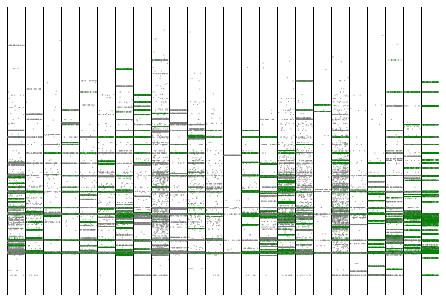

In [40]:
#palette = ['green', 'gray','black', 'purple', 'red']
palette = ['green', 'gray']
sns.despine(bottom=True) # removes right and top axis lines
#sns.violinplot(x=chrs, y=lens, inner= None, color='.8')
sns.stripplot(x=chrs, y=lens,  hue=corrected, palette=palette, size=1, jitter=0.45)
#sns.lineplot(x=ccs, y=chr_ratios, size=7, legend=None, label='Percentage of correctly predicted calls')
#plt.xlabel("Chromosome", fontsize=8)
#plt.ylabel("$log_{10}$(Length of Exon (bp))", fontsize=8)
#plt.axhline(y=np.median(lens), color='blue', linestyle='--', linewidth=1, label='Median CNV length')
#plt.axhline(y=500, color='black', linestyle='dashdot', linewidth=0.5, label='0 percent correction')
#plt.axhline(y=650, color='red', linestyle='dashdot', linewidth=0.5, label='100 percent correction')
plt.xticks(ticks=range(0,24), labels=[str(i) for i in range(1,23)] + ['X', 'Y'], fontsize=8)
plt.yticks(ticks=[1.5,2,2.5,3,3.5,4], fontsize=8)
locations = [chr_ratios[i] + 15 if i not in [5,6,7,13,17,20,22] else chr_ratios[i] -15 for i in range(len(chr_ratios))] 
locations[7] = locations[7]+10

"""
for i, txt in enumerate(chr_ratios):
    plt.annotate(str(percs[i])[:4], (ccs[i], locations[i]), fontsize=14)
"""
plt.axvline(x=-0.5, color='black', linestyle='-', linewidth=1)
plt.axvline(x=0.5, color='black', linestyle='-', linewidth=1)

plt.axvline(x=1.5, color='black', linestyle='-', linewidth=1)
plt.axvline(x=2.5, color='black', linestyle='-', linewidth=1)
plt.axvline(x=3.5, color='black', linestyle='-', linewidth=1)
plt.axvline(x=4.5, color='black', linestyle='-', linewidth=1)
plt.axvline(x=5.5, color='black', linestyle='-', linewidth=1)
plt.axvline(x=6.5, color='black', linestyle='-', linewidth=1)
plt.axvline(x=7.5, color='black', linestyle='-', linewidth=1)
plt.axvline(x=8.5, color='black', linestyle='-', linewidth=1)
plt.axvline(x=9.5, color='black', linestyle='-', linewidth=1)
plt.axvline(x=10.5, color='black', linestyle='-', linewidth=1)
plt.axvline(x=11.5, color='black', linestyle='-', linewidth=1)
plt.axvline(x=12.5, color='black', linestyle='-', linewidth=1)
plt.axvline(x=13.5, color='black', linestyle='-', linewidth=1)
plt.axvline(x=14.5, color='black', linestyle='-', linewidth=1)
plt.axvline(x=15.5, color='black', linestyle='-', linewidth=1)
plt.axvline(x=16.5, color='black', linestyle='-', linewidth=1)
plt.axvline(x=17.5, color='black', linestyle='-', linewidth=1)
plt.axvline(x=18.5, color='black', linestyle='-', linewidth=1)
plt.axvline(x=19.5, color='black', linestyle='-', linewidth=1)
plt.axvline(x=20.5, color='black', linestyle='-', linewidth=1)
plt.axvline(x=21.5, color='black', linestyle='-', linewidth=1)
plt.axvline(x=22.5, color='black', linestyle='-', linewidth=1)
plt.axvline(x=23.5, color='black', linestyle='-', linewidth=1)



plt.tight_layout()
plt.ylim(ymax = 4, ymin = 1.75)

#plt.legend( loc='upper right', borderaxespad=0., framealpha=0.5, facecolor ='white', frameon=True, fontsize=14)
#plt.legend( loc='upper right')
plt.xticks([])
plt.yticks([])
#plt.axis("off")

#plt.show()
plt.legend().set_visible(False)
plt.gca().set_axis_off()
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
            hspace = 0, wspace = 0)
plt.margins(0,0)
fig = plt.savefig('./NEW_chromosome_analysis_ecole_exons.png', bbox_to_inches='tight', dpi=500)


#plt.savefig('./chromosome_analysis_ecole_exons.pdf', bbox_to_inches='tight', dpi=100)







#ax = sns.boxplot(y=chrs, x=lens, hue=corrected, palette="muted")
#pdb.set_trace()
#ax.set(ylabel='length of CNV in base-pair')
#plt.show()


C:\Users\mehme\AppData\Local\Temp\ipykernel_18332\350403824.py:24: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_to_inches" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('./NEW_chromosome_analysis_ecole_exons.pdf', bbox_to_inches='tight', dpi=500)


[432. 288.]


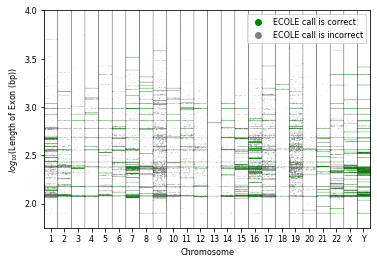

<Figure size 432x288 with 0 Axes>

In [50]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from matplotlib.lines import Line2D

def ymap(k):
    return (2000/2.25)*(4-k)

plt.tight_layout()
img = np.asarray(Image.open('NEW_chromosome_analysis_ecole_exons.png'))
plt.yticks([ymap(4),ymap(3.5),ymap(3),ymap(2.5),ymap(2),ymap(1.5)],[4.0,3.5,3.0,2.5,2.0,1.5],fontsize=8)
plt.xticks(np.arange(0+(img.shape[1]/48),img.shape[1]+(img.shape[1]/48),img.shape[1]/24), [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,"X","Y"],fontsize=8)
plt.xlabel("Chromosome", fontsize=8)
plt.ylabel("$log_{10}$(Length of Exon (bp))", fontsize=8)
legend_elements = [Line2D([0], [0], marker='o', color='w', label='ECOLE call is correct',
                          markerfacecolor='g', markersize=8),
                   Line2D([0], [0], marker='o', color='w', label='ECOLE call is incorrect',
                          markerfacecolor='gray', markersize=8)]
plt.legend(handles=legend_elements, loc='upper right',prop={'size': 8})
#plt.subplots_adjust(top = 0.9, bottom = 0.1, right = 0.9, left = 0.1, hspace = 0.1, wspace = 0.1)
plt.margins(0,0)
plt.imshow(img)

plt.savefig('./NEW_chromosome_analysis_ecole_exons.pdf', bbox_to_inches='tight', dpi=500)
fig = plt.figure()
size = fig.get_size_inches()*fig.dpi # size in pixels
print(size)
#plt.savefig('./NEW_chromosome_analysis_ecole_exons.png', bbox_to_inches='tight', dpi=500)
plt.show()